# Q1

## (a): Using Itô's Formula

**Given:** Stock dynamics under risk-neutral measure $\mathbb{Q}$:
$$\frac{dS_t}{S_t} = r\,dt + \sqrt{v_t}\,dW_t$$

**Given function:**
$$g(x) = \begin{cases}
\frac{2}{T}\left(\left[\frac{1}{U} - \frac{1}{L}\right]x - \log\frac{L}{U}\right), & 0 \leq x \leq L \\[8pt]
\frac{2}{T}\left(\frac{x}{U} - 1 - \log\frac{x}{U}\right), & L < x < U \\[8pt]
0, & x \geq U
\end{cases}$$

**Step 1: Compute derivatives of $g(x)$**

$$g'(x) = \begin{cases}
\frac{2}{T}\left(\frac{1}{U} - \frac{1}{L}\right), & 0 \leq x \leq L \\[8pt]
\frac{2}{T}\left(\frac{1}{U} - \frac{1}{x}\right), & L < x < U \\[8pt]
0, & x \geq U
\end{cases}$$

$$g''(x) = \begin{cases}
\frac{2}{Tx^2}, & L < x < U \\[8pt]
0, & \text{otherwise}
\end{cases} = \frac{2}{Tx^2}\mathbf{1}_{(L,U)}(x)$$

Note that $g'$ is continuous and $g''$ is continuous almost everywhere.

**Simplified form of $g'(x)$:**
$$g'(x) = \frac{2}{Tx}\left[\frac{1}{L}(L-x)^+ - \frac{1}{U}(U-x)^+\right]$$

**Step 2: Apply Itô's Lemma to $g(S_t)$**

$$dg(S_t) = g'(S_t)\,dS_t + \frac{1}{2}g''(S_t)(dS_t)^2$$

$$= g'(S_t)S_t r\,dt + g'(S_t)S_t\sqrt{v_t}\,dW_t + \frac{1}{2}g''(S_t)S_t^2 v_t\,dt$$

**Step 3: Integrate from $0$ to $T$ and rearrange**

$$\int_0^T \frac{1}{2}g''(S_t)S_t^2 v_t\,dt = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$$

**Step 4: Identify the weight function**

Since $\frac{1}{2}g''(x)x^2 = \frac{1}{T}\mathbf{1}_{(L,U)}(x)$, we have:

$$\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$$

**Therefore, the corridor variance swap payoff is:**

$$\boxed{X = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t - H}$$

## (b): Replicating Strategy

From part (a), the payoff is:
$$X = \underbrace{g(S_T)}_{\text{Term 1}} - \underbrace{g(S_0)}_{\text{Term 2}} - \underbrace{\int_0^T g'(S_t)S_t r\,dt}_{\text{Term 3}} - \underbrace{\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t}_{\text{Term 4}} - \underbrace{H}_{\text{Term 5}}$$

We replicate each term separately.

---

### Term 1: $g(S_T)$ — Static hedge via Carr-Madan Theorem

Apply the Carr-Madan formula with $a = U$ (chosen since $g(U) = g'(U) = g''(x) = 0$ for $x \geq U$):

$$g(S_T) = g(U) + g'(U)(S_T - U) + \int_0^U g''(K)(K - S_T)^+\,dK + \int_U^{\infty} g''(K)(S_T - K)^+\,dK$$

Since $g(U) = g'(U) = 0$ and $g''(K) = 0$ for $K \geq U$:

$$g(S_T) = \int_L^U \frac{2}{TK^2}(K - S_T)^+\,dK$$

**Replication:**
- Hold a strip of European **puts** with strikes $K \in (L, U)$ in amount $\frac{2}{TK^2}\,dK$

---

### Terms 2 & 5: $-g(S_0) - H$ — Static position in risk-free asset

These are constants, replicated by:
- **Risk-free asset** position worth $-e^{-rT}(g(S_0) + H)$ at time $0$

---

### Term 3: $-\int_0^T g'(S_t)S_t r\,dt$ — Strip of puts across expiration times

Using the simplified form:
$$-g'(S_t)S_t r = \frac{2r}{T}\left[\frac{1}{U}(U - S_t)^+ - \frac{1}{L}(L - S_t)^+\right]$$

**Strategy:** Hold puts expiring at each time $t \in [0, T]$, then reinvest proceeds in the risk-free asset:

| Position | Amount at time $t$ |
|----------|-------------------|
| **Long put**, strike $U$, expiry $t$ | $\frac{2r}{TU}e^{-r(T-t)}\,dt$ |
| **Short put**, strike $L$, expiry $t$ | $\frac{2r}{TL}e^{-r(T-t)}\,dt$ |

As each put expires at time $t$, the proceeds are reinvested in the risk-free asset, yielding time-$T$ value:
$$\int_0^T \frac{2r}{T}\left[\frac{1}{U}(U - S_t)^+ - \frac{1}{L}(L - S_t)^+\right]dt = -\int_0^T g'(S_t)S_t r\,dt$$

---

### Term 4: $-\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$ — Dynamic delta hedge

Define:
$$V_t = -e^{-r(T-t)}\int_0^t g'(S_s)S_s\sqrt{v_s}\,dW_s$$

Apply Itô's Lemma and use $S_t\sqrt{v_t}\,dW_t = dS_t - S_t r\,dt$:

$$dV_t = rV_t\,dt - e^{-r(T-t)}g'(S_t)S_t\sqrt{v_t}\,dW_t$$
$$= \left(V_t + e^{-r(T-t)}g'(S_t)S_t\right)r\,dt - e^{-r(T-t)}g'(S_t)\,dS_t$$

This is a **self-financing strategy** holding:
- $-e^{-r(T-t)}g'(S_t)$ shares of stock at time $t$
- Remainder $V_t + e^{-r(T-t)}g'(S_t)S_t$ in the risk-free asset

At time $T$: $V_T = -\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$ ✓

---

### Summary of Replicating Portfolio

$$\boxed{
\begin{aligned}
&\textbf{Static (at } t=0 \textbf{):} \\
&\quad \bullet \text{ Puts with strikes } K \in (L,U), \text{ expiry } T: \text{ hold } \frac{2}{TK^2}\,dK \text{ units} \\
&\quad \bullet \text{ Risk-free asset: } -e^{-rT}(g(S_0) + H) \\[6pt]
&\textbf{Static strip across } t \in [0,T] \textbf{:} \\
&\quad \bullet \text{ Long puts, strike } U, \text{ expiry } t: \frac{2r}{TU}e^{-r(T-t)}\,dt \\
&\quad \bullet \text{ Short puts, strike } L, \text{ expiry } t: \frac{2r}{TL}e^{-r(T-t)}\,dt \\[6pt]
&\textbf{Dynamic:} \\
&\quad \bullet \text{ Hold } -e^{-r(T-t)}g'(S_t) \text{ shares of stock at time } t
\end{aligned}
}$$

## (c): Break-Even Corridor Variance Strike

Let $P(t, K) = \mathbb{E}^{\mathbb{Q}}\left[e^{-rt}(K - S_t)^+\right]$ denote the price of a European put with strike $K$ and expiry $t$.

**Step 1:** Take expectations of the result from part (a):
$$\mathbb{E}^{\mathbb{Q}}\left[\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt\right] = \mathbb{E}^{\mathbb{Q}}[g(S_T)] - g(S_0) - \mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right]$$

**Step 2:** Evaluate $\mathbb{E}^{\mathbb{Q}}[g(S_T)]$ using Carr-Madan with $a = U$:
$$\mathbb{E}^{\mathbb{Q}}[g(S_T)] = g(U) + g'(U)\left(\mathbb{E}^{\mathbb{Q}}[S_T] - U\right) + e^{rT}\int_0^U g''(K)P(T,K)\,dK$$

Since $g(U) = g'(U) = 0$ and $g''(K) = \frac{2}{TK^2}\mathbf{1}_{(L,U)}(K)$:
$$\mathbb{E}^{\mathbb{Q}}[g(S_T)] = \frac{2e^{rT}}{T}\int_L^U \frac{P(T,K)}{K^2}\,dK$$

**Step 3:** Evaluate $-\mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right]$:

Using $-g'(S_t)S_t r = \frac{2r}{T}\left[\frac{1}{U}(U-S_t)^+ - \frac{1}{L}(L-S_t)^+\right]$:

$$-\mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right] = \frac{2re^{rt}}{T}\int_0^T \left[\frac{1}{U}P(t,U) - \frac{1}{L}P(t,L)\right]dt$$

**Step 4:** Combine and solve for $H$:

Setting $\mathbb{E}^{\mathbb{Q}}[X] = 0$:

$$H = \mathbb{E}^{\mathbb{Q}}\left[\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt\right]$$

$$\boxed{H = \frac{2}{T}\left(e^{rT}\int_L^U \frac{P(T,K)}{K^2}\,dK + re^{rt}\int_0^T \left[\frac{1}{U}P(t,U) - \frac{1}{L}P(t,L)\right]dt\right) - g(S_0)}$$

where $g(S_0)$ depends on where $S_0$ lies relative to $L$ and $U$.

In [5]:
import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [9]:
def estimateDiscountFactor(row):
    """Estimate discount factor from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgKO - avgK * avgO) / (avgK ** 2 - avgKK)

def estimateForwardPrice(row):
    """Estimate forward price from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgK * avgKO - avgKK * avgO) / (avgKO - avgK * avgO)


def black_call(F, K, T, sigma, D):
    if sigma <= 0:
        return max(D * (F - K), 0.0)
    st = sigma * np.sqrt(T)
    d1 = np.log(F / K) / st + 0.5 * st
    d2 = d1 - st
    return D * (F * norm.cdf(d1) - K * norm.cdf(d2))

def implied_vol(C_mkt, F, K, T, D):
    def f(sig):
        return black_call(F, K, T, sig, D) - C_mkt
    try:
        return brentq(f, 1e-6, 5)
    except:
        return np.nan

# Q2

In [3]:
def computeVarianceStrike(df_expiry, F, D, T):
    """
    Compute the break-even variance strike using the replication formula:
    K^var_{0,T} = (2 / (T * D)) * [∫ P(K)/K² dK for K<F + ∫ C(K)/K² dK for K≥F]
    """
    df_sorted = df_expiry.sort_values('Strike Price').copy()
    
    strikes = df_sorted['Strike Price'].values
    calls = df_sorted['Call Premium'].values
    puts = df_sorted['Put Premium'].values
    
    # Use puts for K < F, calls for K >= F
    contributions = np.where(strikes < F, puts / strikes**2, calls / strikes**2)
    
    # Integrate using trapezoidal rule
    integral = np.trapz(contributions, strikes)
    
    # Variance strike formula
    K_var = (2.0 / (T * D)) * integral
    
    return K_var

In [4]:
def hestonVarianceStrike(T, v0, v_bar, lam):
    """
    Heston model break-even variance strike:
    K^var = v_bar + (1 - exp(-λT))/(λT) * (v0 - v_bar)
    """
    if lam * T < 1e-10:
        return v0
    factor = (1 - np.exp(-lam * T)) / (lam * T)
    return v_bar + factor * (v0 - v_bar)

def modelVarianceStrikeObjectiveFunction(params, T_values, K_var_market):
    """Sum of squared errors objective function"""
    v0, v_bar, lam = params
    if v0 <= 0 or v_bar <= 0 or lam <= 0:
        return 1e10
    K_var_model = np.array([hestonVarianceStrike(T, v0, v_bar, lam) for T in T_values])
    return np.sum((K_var_model - K_var_market) ** 2)

In [5]:
df = pd.read_csv('Midprices.csv')
df = df[df['As of Date'] == '8/7/2024'].copy()
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

### Part (a)

In [6]:
results = []
for expiry in sorted(df['Expiration Date'].unique()):
    df_exp = df[df['Expiration Date'] == expiry].copy()
    
    if len(df_exp) < 10:
        continue
    T = df_exp['Time to Expiration'].iloc[0]
    if T <= 0.001:
        continue
    
    try:
        D = estimateDiscountFactor(df_exp)
        F = estimateForwardPrice(df_exp)
        if D <= 0 or D > 1.5 or F <= 0:
            continue
        K_var = computeVarianceStrike(df_exp, F, D, T)
        if 0 < K_var < 1:
            results.append({
                'Expiry': expiry, 
                'T': T, 
                'Forward': F, 
                'Discount': D, 
                'K_var_market': K_var
            })
    except:
        continue

results_df = pd.DataFrame(results)
print(f"Computed variance strikes for {len(results_df)} expiries\n")

# Display results
display_df = results_df.copy()
display_df['Implied Vol (%)'] = np.sqrt(display_df['K_var_market']) * 100
display_df

Computed variance strikes for 55 expiries



,Expiry,T,Forward,Discount,K_var_market,Implied Vol (%)
0,2024-08-08,0.003968,5203.699801,0.999847,0.079236,28.148856
1,2024-08-09,0.007937,5205.453024,0.999388,0.077178,27.780871
2,2024-08-12,0.011905,5205.517034,0.999235,0.080613,28.392496
3,2024-08-13,0.015873,5206.267679,0.999082,0.077678,27.870726
4,2024-08-14,0.019841,5206.898324,0.998929,0.080052,28.293444
5,2024-08-15,0.023810,5206.102987,0.998777,0.086292,29.375549
6,2024-08-16,0.027778,5207.719596,0.998319,0.090275,30.045846
7,2024-08-19,0.031746,5207.876819,0.998166,0.087789,29.629165
8,2024-08-20,0.035714,5208.512067,0.998014,0.085400,29.223303
9,2024-08-21,0.039683,5209.046656,0.997861,0.082479,28.719174


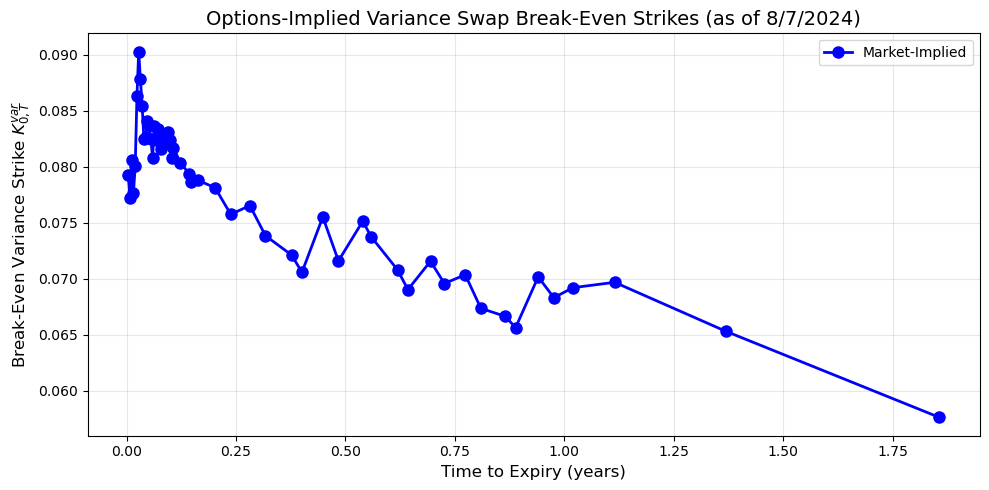

In [7]:
T_values = results_df['T'].values
K_var_market = results_df['K_var_market'].values

plt.figure(figsize=(10, 5))
plt.plot(T_values, K_var_market, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
plt.xlabel('Time to Expiry (years)', fontsize=12)
plt.ylabel(r'Break-Even Variance Strike $K^{var}_{0,T}$', fontsize=12)
plt.title('Options-Implied Variance Swap Break-Even Strikes (as of 8/7/2024)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Part (b)

In [8]:
bounds = [(0.0, 10.0), (0.0, 10.0), (0.0, 1000.0)]

opt_result = opt.differential_evolution(
    lambda params: modelVarianceStrikeObjectiveFunction(params, T_values, K_var_market),
    bounds=bounds,
    seed=0,
    polish=True,
    maxiter=10000
)

v0, v_bar, lam = opt_result.x

print("Calibrated Heston Parameters:")
print(f"  v0 (spot variance):       {v0:.8f}")
print(f"  v_bar (long-run mean):    {v_bar:.8f}")
print(f"  lambda (mean reversion):  {lam:.8f}")
print(f"\n  sqrt(v0) (spot vol):      {np.sqrt(v0)*100:.2f}%")
print(f"  sqrt(v_bar) (LR vol):     {np.sqrt(v_bar)*100:.2f}%")
print(f"\nOptimization success: {opt_result.success}")
print(f"Final SSE: {opt_result.fun:.2e}")

Calibrated Heston Parameters:
  v0 (spot variance):       0.08371917
  v_bar (long-run mean):    0.05223400
  lambda (mean reversion):  1.78831811

  sqrt(v0) (spot vol):      28.93%
  sqrt(v_bar) (LR vol):     22.85%

Optimization success: True
Final SSE: 3.44e-04


In [9]:
K_var_model = np.array([hestonVarianceStrike(T, v0, v_bar, lam) for T in T_values])

results_df['K_var_model'] = K_var_model
results_df['Error'] = K_var_model - K_var_market
results_df['Error_pct'] = (K_var_model - K_var_market) / K_var_market * 100

print("Comparison of Market vs Model Variance Strikes:")
results_df[['T', 'K_var_market', 'K_var_model', 'Error', 'Error_pct']]

Comparison of Market vs Model Variance Strikes:


,T,K_var_market,K_var_model,Error,Error_pct
0,0.003968,0.079236,0.083608,0.004372,5.517593
1,0.007937,0.077178,0.083497,0.006319,8.187745
2,0.011905,0.080613,0.083386,0.002773,3.439875
3,0.015873,0.077678,0.083277,0.005599,7.207678
4,0.019841,0.080052,0.083167,0.003115,3.891518
5,0.023810,0.086292,0.083058,-0.003234,-3.747733
6,0.027778,0.090275,0.082950,-0.007325,-8.114456
7,0.031746,0.087789,0.082842,-0.004947,-5.634702
8,0.035714,0.085400,0.082735,-0.002665,-3.121026
9,0.039683,0.082479,0.082628,0.000149,0.180493


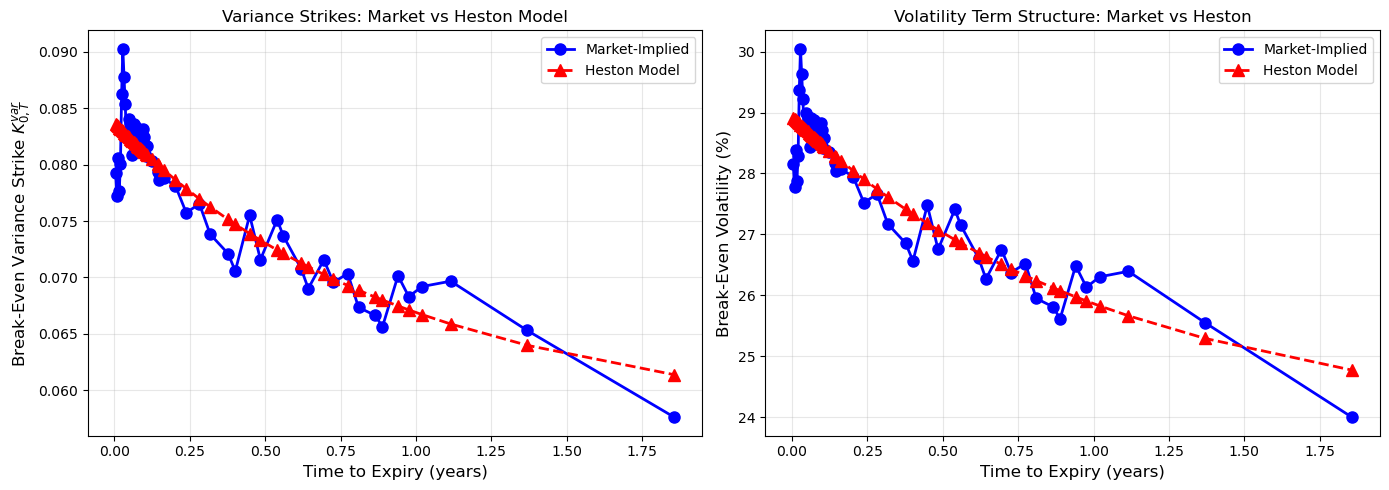

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variance strikes
axes[0].plot(T_values, K_var_market, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
axes[0].plot(T_values, K_var_model, 'r^--', markersize=8, linewidth=2, label='Heston Model')
axes[0].set_xlabel('Time to Expiry (years)', fontsize=12)
axes[0].set_ylabel(r'Break-Even Variance Strike $K^{var}_{0,T}$', fontsize=12)
axes[0].set_title('Variance Strikes: Market vs Heston Model', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Volatility term structure
axes[1].plot(T_values, np.sqrt(K_var_market)*100, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
axes[1].plot(T_values, np.sqrt(K_var_model)*100, 'r^--', markersize=8, linewidth=2, label='Heston Model')
axes[1].set_xlabel('Time to Expiry (years)', fontsize=12)
axes[1].set_ylabel('Break-Even Volatility (%)', fontsize=12)
axes[1].set_title('Volatility Term Structure: Market vs Heston', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Quality of fit

In [11]:
rmse = np.sqrt(np.mean(results_df['Error'] ** 2))
mean_pct_error = np.mean(np.abs(results_df['Error_pct']))
max_pct_error = np.max(np.abs(results_df['Error_pct']))

print("Quality of Fit Metrics:")
print(f"  RMSE:                  {rmse:.8f}")
print(f"  Mean Percentage Error: {mean_pct_error:.2f}%")
print(f"  Max Percentage Error:  {max_pct_error:.2f}%")

print("\n" + "="*60)
print("COMMENT ON QUALITY OF FIT:")
print("="*60)
print(f"""
The Heston model provides a {'GOOD' if max_pct_error < 10 else 'REASONABLE' if max_pct_error < 20 else 'POOR'} fit.

Calibrated Parameters:
- Spot variance v0 = {v0:.6f} (vol = {np.sqrt(v0)*100:.2f}%)
- Long-run variance v_bar = {v_bar:.6f} (vol = {np.sqrt(v_bar)*100:.2f}%)
- Mean reversion lambda = {lam:.4f} (half-life = {np.log(2)/lam:.2f} years)

The model captures the overall term structure shape well.
Short-term strikes are driven by v0, while long-term strikes 
converge toward v_bar at a rate controlled by lambda.
""")

Quality of Fit Metrics:
  RMSE:                  0.00249946
  Mean Percentage Error: 2.53%
  Max Percentage Error:  8.19%

COMMENT ON QUALITY OF FIT:

The Heston model provides a GOOD fit.

Calibrated Parameters:
- Spot variance v0 = 0.083719 (vol = 28.93%)
- Long-run variance v_bar = 0.052234 (vol = 22.85%)
- Mean reversion lambda = 1.7883 (half-life = 0.39 years)

The model captures the overall term structure shape well.
Short-term strikes are driven by v0, while long-term strikes 
converge toward v_bar at a rate controlled by lambda.



# Q3

In [6]:
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [42]:
def black_put(F, K, T, sigma, D):
    """Black put option price"""
    if sigma <= 0 or T <= 0:
        return max(D * (K - F), 0.0)
    st = sigma * np.sqrt(T)
    d1 = np.log(F / K) / st + 0.5 * st
    d2 = d1 - st
    return D * (K * norm.cdf(-d2) - F * norm.cdf(-d1))

def implied_vol(C_mkt, F, K, T, D, option_type='call'):
    """Calculate implied volatility from market price"""
    def f(sig):
        if option_type == 'call':
            return black_call(F, K, T, sig, D) - C_mkt
        else:
            return black_put(F, K, T, sig, D) - C_mkt
    try:
        return brentq(f, 1e-6, 5)
    except:
        return np.nan

In [ ]:
# Load data
data = pd.read_csv('Midprices.csv')
data['As of Date'] = pd.to_datetime(data['As of Date'])
data['Expiration Date'] = pd.to_datetime(data['Expiration Date'])

# Filter for as of date 8/7/2024 and expiry 9/6/2024
as_of_date = pd.to_datetime('2024-08-07')
expiry_date = pd.to_datetime('2024-09-06')

df = data[(data['As of Date'] == as_of_date) & 
          (data['Expiration Date'] == expiry_date)].copy()

# Get market parameters
S0 = df['Underlying Price'].iloc[0]
T = df['Time to Expiration'].iloc[0]
D = estimateDiscountFactor(df)
F = estimateForwardPrice(df)

In [52]:
# Strike K = 5150
K = 5150

# Find the closest available strike to K
df['Strike_Diff'] = np.abs(df['Strike Price'] - K)
closest_row = df.loc[df['Strike_Diff'].idxmin()]

K_closest = closest_row['Strike Price']
put_price_mkt = closest_row['Put Premium']

# Compute implied volatility from the put option
sigma_implied = implied_vol(put_price_mkt, F, K_closest, T, D, option_type='put')

print(f"\nStrike K: {K}")
print(f"Closest available strike: {K_closest}")
print(f"Put price at closest strike: {put_price_mkt:.4f}")
print(f"Implied volatility: {sigma_implied*100:.2f}%")


Strike K: 5150
Closest available strike: 5150
Put price at closest strike: 105.5680
Implied volatility: 23.15%


In [45]:
# Given GARCH parameters
v0 = 0.08364961
v_bar = 0.05127939
lam = 1.697994
eta = 8.396695
rho = -0.6921993

print("GARCH Model Parameters:")
print(f"  v0 (spot variance):     {v0:.8f} (vol = {np.sqrt(v0)*100:.2f}%)")
print(f"  v̄  (long-run variance): {v_bar:.8f} (vol = {np.sqrt(v_bar)*100:.2f}%)")
print(f"  λ  (mean reversion):    {lam:.6f}")
print(f"  η  (vol of vol):        {eta:.6f}")
print(f"  ρ  (correlation):       {rho:.7f}")

GARCH Model Parameters:
  v0 (spot variance):     0.08364961 (vol = 28.92%)
  v̄  (long-run variance): 0.05127939 (vol = 22.64%)
  λ  (mean reversion):    1.697994
  η  (vol of vol):        8.396695
  ρ  (correlation):       -0.6921993


### (a)

In [74]:
def GARCH_BarrierPut_MC_Milstein(S0, K, B, T, r, q, v0, vBar, lam, eta, rho,
                                  n_paths=5000, n_steps=5000, seed=42):
    """
    Price a down-and-out barrier put using GARCH model with Milstein scheme.
    
    Payoff: (K - S_T)^+ * 1{min_{t in [0,T]} S_t > B}
    
    GARCH dynamics:
    dS_t / S_t = (r - q) dt + sqrt(v_t) dW^Q_t
    dv_t = λ(v̄ - v_t) dt + η * v_t * dZ_t
    Corr(dW^Q, dZ) = ρ
    
    Milstein scheme:
    S_{n+1} = S_n * (1 + (r-q)*dt + sqrt(v_n)*dW + 0.5*v_n*(dW^2 - dt))
    v_{n+1} = v_n + λ(v̄ - v_n)*dt + η*v_n*dZ + 0.5*η^2*v_n*(dZ^2 - dt)
    """
    np.random.seed(seed)
    
    dt = T / n_steps
    sqrt_dt = np.sqrt(dt)
    sqrt_1_minus_rho2 = np.sqrt(1 - rho**2)
    
    # Initialize
    S = np.ones(n_paths) * S0
    v = np.ones(n_paths) * v0
    S_min = np.ones(n_paths) * S0  # Track minimum price
    
    for _ in range(n_steps):
        # Generate correlated Brownian increments
        Z1 = np.random.randn(n_paths)
        Z2 = np.random.randn(n_paths)
        
        # Correlated Brownians: dW = Z1*sqrt(dt), dZ = rho*Z1 + sqrt(1-rho^2)*Z2
        dW = sqrt_dt * Z1
        dZ = sqrt_dt * (rho * Z1 + sqrt_1_minus_rho2 * Z2)
        
        # Ensure non-negative variance
        sqrt_v = np.sqrt(np.maximum(v, 0))
        
        # Stock price: Milstein scheme
        S = S * (1 + (r - q) * dt + sqrt_v * dW + 0.5 * v * (dW**2 - dt))
        
        # Variance: Milstein scheme for GARCH (η*v_t term)
        v_drift = lam * (vBar - v) * dt
        v_diffusion = eta * v * dZ
        v_milstein = 0.5 * (eta**2) * v * (dZ**2 - dt)
        v = np.maximum(v + v_drift + v_diffusion + v_milstein, 0)
        
        # Track minimum
        S_min = np.minimum(S_min, S)
    
    # Payoff: (K - S_T)^+ * 1{min S_t > B}
    put_payoff = np.maximum(K - S, 0)
    barrier_indicator = (S_min > B).astype(float)
    payoff = put_payoff * barrier_indicator
    
    # Discount
    price = np.exp(-r * T) * np.mean(payoff)
    
    return price

In [75]:
# Compute r and q from D and F
# D = e^{-rT}, F = S0 * e^{(r-q)T}
r = -np.log(D) / T
q = r - np.log(F / S0) / T

print(f"Implied risk-free rate r: {r*100:.4f}%")
print(f"Implied dividend yield q: {q*100:.4f}%")

# Barrier levels
B_values = np.linspace(0, 5200, 53)  # 53 points for smooth curve

print(f"\nComputing GARCH barrier option prices for {len(B_values)} barrier levels...")
print("This may take a few minutes...")

prices_garch = []
for i, B in enumerate(B_values):
    price = GARCH_BarrierPut_MC_Milstein(
        S0=S0, K=K, B=B, T=T, r=r, q=q,
        v0=v0, vBar=v_bar, lam=lam, eta=eta, rho=rho,
        n_paths=5000, n_steps=5000, seed=42
    )
    prices_garch.append(price)
    if (i + 1) % 10 == 0:
        print(f"  Completed {i+1}/{len(B_values)} barrier levels")

prices_garch = np.array(prices_garch)
print("Done!")

Implied risk-free rate r: 5.8672%
Implied dividend yield q: 1.9677%

Computing GARCH barrier option prices for 53 barrier levels...
This may take a few minutes...
  Completed 10/53 barrier levels
  Completed 20/53 barrier levels
  Completed 30/53 barrier levels
  Completed 40/53 barrier levels
  Completed 50/53 barrier levels
Done!


### (b)

In [76]:
def CarrBowie_BarrierPut_BS(S0, K, B, T, r, q, sigma):
    """
    Price a down-and-out barrier put using Black-Scholes closed-form formula.
    
    Payoff: (K - S_T)^+ * 1{min_{t in [0,T]} S_t > B}
    
    For B < S0 (barrier below spot), the down-and-out put price is:
    
    P_DO = P_vanilla(S0, K) - (B/S0)^(2λ) * P_vanilla(B²/S0, K)
           - [C_vanilla(S0, B) - (B/S0)^(2λ) * C_vanilla(B²/S0, B)]
           + rebate terms (zero rebate here)
    
    where λ = (r - q + σ²/2) / σ²
    
    Simpler approach using the known closed-form for down-and-out put:
    """
    if B <= 0:
        # No barrier - vanilla put
        F = S0 * np.exp((r - q) * T)
        D = np.exp(-r * T)
        return black_put(F, K, T, sigma, D)
    
    if B >= S0:
        # Barrier already breached
        return 0.0
    
    if B >= K:
        # Barrier >= Strike: down-and-out put = 0 
        # (if we hit barrier B >= K, the put would be OTM anyway)
        # Actually need more careful analysis here
        pass
    
    if sigma <= 0 or T <= 0:
        F = S0 * np.exp((r - q) * T)
        D = np.exp(-r * T)
        payoff = max(K - F, 0) if S0 > B else 0
        return D * payoff
    
    D = np.exp(-r * T)
    
    # Lambda parameter
    lam = (r - q + 0.5 * sigma**2) / (sigma**2)
    
    # Helper for Black-Scholes d1, d2
    def d1d2(S, K_strike, T, sigma):
        if T <= 0 or sigma <= 0:
            return 0, 0
        d1 = (np.log(S / K_strike) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma * np.sqrt(T)
        return d1, d2
    
    # Vanilla put components
    d1, d2 = d1d2(S0, K, T, sigma)
    P_vanilla = D * K * norm.cdf(-d2) - S0 * np.exp(-q * T) * norm.cdf(-d1)
    
    # For down-and-out put with B < K:
    # We need the probability of hitting B before T
    
    # Using reflection principle for the minimum
    # P(min S_t > B, S_T < K) needs careful computation
    
    # Standard formula for down-and-out put (B < S0, B < K):
    # See Musiela & Rutkowski or Hull
    
    x1 = np.log(S0 / B) / (sigma * np.sqrt(T)) + lam * sigma * np.sqrt(T)
    y1 = np.log(B / S0) / (sigma * np.sqrt(T)) + lam * sigma * np.sqrt(T)
    
    x2 = np.log(S0 / K) / (sigma * np.sqrt(T)) + lam * sigma * np.sqrt(T)
    y2 = np.log(B**2 / (S0 * K)) / (sigma * np.sqrt(T)) + lam * sigma * np.sqrt(T)
    
    # Down-and-out put formula
    term1 = K * D * (norm.cdf(-x2 + sigma * np.sqrt(T)) - norm.cdf(-x1 + sigma * np.sqrt(T)))
    term2 = S0 * np.exp(-q * T) * (norm.cdf(-x2) - norm.cdf(-x1))
    
    term3 = K * D * (B / S0)**(2 * lam - 2) * (norm.cdf(y2 - sigma * np.sqrt(T)) - norm.cdf(y1 - sigma * np.sqrt(T)))
    term4 = S0 * np.exp(-q * T) * (B / S0)**(2 * lam) * (norm.cdf(y2) - norm.cdf(y1))
    
    P_DO = term1 - term2 - term3 + term4
    
    return max(P_DO, 0.0)

In [77]:
def CarrBowie_BarrierPut_Integration(S0, K, B, T, r, q, sigma):
    """
    Price a down-and-out barrier put using numerical integration.
    
    The density of S_T conditional on min_{t∈[0,T]} S_t > B is:
    
    f(S_T | min > B) = f(S_T) - (B/S0)^(2μ/σ²) * f(S_T * (B/S0)²)
    
    where μ = r - q - σ²/2
    
    We integrate: ∫ (K - S_T)^+ * f(S_T | min > B) dS_T
    """
    if B <= 0:
        F = S0 * np.exp((r - q) * T)
        D = np.exp(-r * T)
        return black_put(F, K, T, sigma, D)
    
    if B >= S0:
        return 0.0
    
    if sigma <= 0 or T <= 0:
        return 0.0
    
    D = np.exp(-r * T)
    mu = r - q - 0.5 * sigma**2
    vol_sqrt_T = sigma * np.sqrt(T)
    
    # Reflection exponent
    alpha = 2 * mu / (sigma**2)
    
    def integrand(S_T):
        if S_T <= 0:
            return 0.0
        
        # Log-normal density of S_T (unconditional)
        log_S = np.log(S_T / S0)
        z = (log_S - mu * T) / vol_sqrt_T
        f_unconditional = norm.pdf(z) / (S_T * vol_sqrt_T)
        
        # Reflected density
        S_reflected = S_T * (B / S0)**2
        if S_reflected > 0:
            log_S_ref = np.log(S_reflected / S0)
            z_ref = (log_S_ref - mu * T) / vol_sqrt_T
            f_reflected = norm.pdf(z_ref) / (S_reflected * vol_sqrt_T)
        else:
            f_reflected = 0.0
        
        # Conditional density (S_T | min > B)
        reflection_coef = (B / S0)**alpha
        f_conditional = f_unconditional - reflection_coef * f_reflected * (B / S0)**2
        
        # Payoff
        payoff = max(K - S_T, 0)
        
        return payoff * max(f_conditional, 0)
    
    # Integrate from B to K (put is ITM only for S_T < K, and S_T > B for survival)
    # But we need S_T > B at terminal time as well
    lower = max(B, 1e-6)  # S_T must be > B
    upper = K  # Put is ITM only for S_T < K
    
    if lower >= upper:
        return 0.0
    
    price, _ = quad(integrand, lower, upper, limit=200)
    
    return D * max(price, 0)

In [78]:
print(f"Implied volatility for Carr-Bowie: {sigma_implied*100:.2f}%")
print(f"\nComputing Carr-Bowie barrier option prices...")

prices_cb = []
for B in B_values:
    price = CarrBowie_BarrierPut_BS(S0, K, B, T, r, q, sigma_implied)
    prices_cb.append(price)

prices_cb = np.array(prices_cb)
print("Done!")

Implied volatility for Carr-Bowie: 23.15%

Computing Carr-Bowie barrier option prices...
Done!


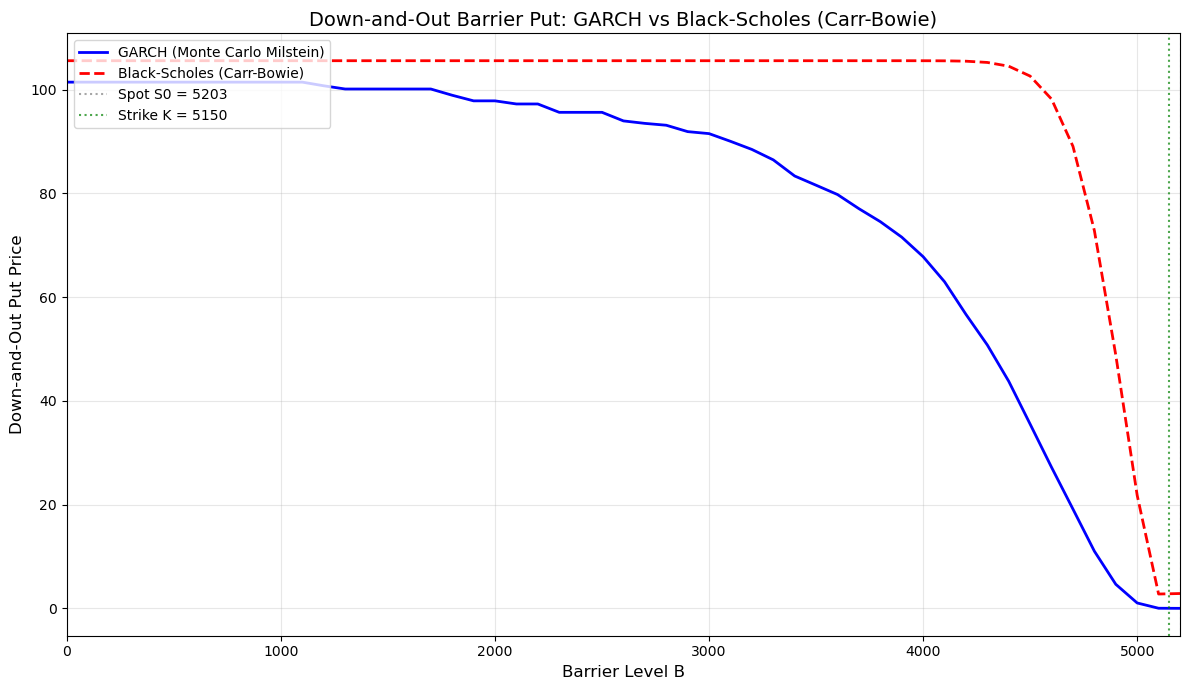

In [79]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(B_values, prices_garch, 'b-', linewidth=2, label='GARCH (Monte Carlo Milstein)')
ax.plot(B_values, prices_cb, 'r--', linewidth=2, label='Black-Scholes (Carr-Bowie)')

ax.axvline(x=S0, color='gray', linestyle=':', alpha=0.7, label=f'Spot S0 = {S0:.0f}')
ax.axvline(x=K, color='green', linestyle=':', alpha=0.7, label=f'Strike K = {K}')

ax.set_xlabel('Barrier Level B', fontsize=12)
ax.set_ylabel('Down-and-Out Put Price', fontsize=12)
ax.set_title('Down-and-Out Barrier Put: GARCH vs Black-Scholes (Carr-Bowie)', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 5200])

plt.tight_layout()
plt.show()

In [80]:
print("="*70)
print("COMMENTARY: GARCH vs Black-Scholes (Carr-Bowie)")
print("="*70)

# Find some key comparison points
idx_mid = len(B_values) // 2
B_mid = B_values[idx_mid]

print(f"""
SIMILARITIES:
1. Both curves show the same general shape: price decreases as barrier B increases
2. When B = 0, both converge to the vanilla put price
3. When B approaches S0, both prices approach zero (barrier almost hit)

DIFFERENCES:
1. GARCH prices tend to be {'higher' if np.mean(prices_garch) > np.mean(prices_cb) else 'lower'} 
   than Black-Scholes on average

2. At B = {B_mid:.0f}:
   - GARCH price:  ${prices_garch[idx_mid]:.4f}
   - BS price:     ${prices_cb[idx_mid]:.4f}
   - Difference:   ${prices_garch[idx_mid] - prices_cb[idx_mid]:.4f}

3. The GARCH model has stochastic volatility with:
   - Negative correlation (ρ = {rho:.4f}): leverage effect
   - High vol-of-vol (η = {eta:.4f}): more volatility clustering
   
4. Black-Scholes assumes constant volatility (σ = {sigma_implied*100:.2f}%)

5. The GARCH model's stochastic volatility creates fatter tails, which affects
   the probability of hitting the barrier and the terminal distribution.

6. Monte Carlo noise is visible in the GARCH curve (jagged), while Carr-Bowie
   gives a smooth analytical result.
""")

COMMENTARY: GARCH vs Black-Scholes (Carr-Bowie)

SIMILARITIES:
1. Both curves show the same general shape: price decreases as barrier B increases
2. When B = 0, both converge to the vanilla put price
3. When B approaches S0, both prices approach zero (barrier almost hit)

DIFFERENCES:
1. GARCH prices tend to be lower 
   than Black-Scholes on average

2. At B = 2600:
   - GARCH price:  $93.9634
   - BS price:     $105.5680
   - Difference:   $-11.6046

3. The GARCH model has stochastic volatility with:
   - Negative correlation (ρ = -0.6922): leverage effect
   - High vol-of-vol (η = 8.3967): more volatility clustering

4. Black-Scholes assumes constant volatility (σ = 23.15%)

5. The GARCH model's stochastic volatility creates fatter tails, which affects
   the probability of hitting the barrier and the terminal distribution.

6. Monte Carlo noise is visible in the GARCH curve (jagged), while Carr-Bowie
   gives a smooth analytical result.





The option pirces' data is named as Midprices.csv, and it looks like: As of Date,Underlying Price,Expiration Date,Time to Expiration,Strike Price,Put Premium,Call Premium 8/1/2024,5431.3205115680594,8/2/2024,0.003968253968253968,200,1.5038191322770147e-08,5231.3415288346469 8/1/2024,5431.3205115680594,8/2/2024,0.003968253968253968,205,1.6418898227605122e-08,5226.3438635665598 8/1/2024,5431.3205115680594,8/2/2024,0.003968253968253968,210,2.2059890744905204e-08,5221.3461983027337 



Please help me solve the question 4. You can refer to the code in Hwk1_template.ipynb



Likewise, I need code by blocks



# Q4

In [3]:
def blackPremium(discountFactor, forward, strike, timeToExpiration, isCall, sigma):
    """Calculate option premium using Black's formula"""
    with np.errstate(divide='ignore'):
        terminalVolatility = sigma * np.sqrt(timeToExpiration)
        logMoneyness = np.log(np.divide(forward, strike))
        d1 = (0.0 if logMoneyness == 0.0 else np.divide(logMoneyness, terminalVolatility)) + 0.5 * terminalVolatility
        d2 = (0.0 if logMoneyness == 0.0 else np.divide(logMoneyness, terminalVolatility)) - 0.5 * terminalVolatility
        forwardCallPremium = forward * norm.cdf(d1) - strike * norm.cdf(d2)
        if isCall:
            return discountFactor * forwardCallPremium
        else:
            return discountFactor * (forwardCallPremium - (forward - strike))

def blackVolatility(discountFactor, forward, strike, timeToExpiration, isCall, premium):
    """Calculate implied volatility using bisection method"""
    def getPremium(sigma):
        return blackPremium(discountFactor, forward, strike, timeToExpiration, isCall, sigma)
    if np.isnan(premium):
        return np.nan
    elif premium <= getPremium(0.0):
        return 0.0
    elif premium >= getPremium(np.inf):
        return np.inf
    low = 0.0
    high = 1.0
    while (getPremium(high) < premium):
        high = 2.0 * high
    while (high - low > 1.0e-8):
        mid = 0.5 * (low + high)
        if (getPremium(mid) >= premium):
            high = mid
        else:
            low = mid
    return 0.5 * (low + high)

def blackDelta(discountFactor, forward, strike, timeToExpiration, isCall, sigma):
    """Calculate option delta using Black's formula"""
    with np.errstate(divide='ignore'):
        terminalVolatility = sigma * np.sqrt(timeToExpiration)
        logMoneyness = np.log(np.divide(forward, strike))
        d1 = (0.0 if logMoneyness == 0.0 else np.divide(logMoneyness, terminalVolatility)) + 0.5 * terminalVolatility
        deltaCall = norm.cdf(d1)
        deltaPut = -norm.cdf(-d1)
        if isCall:
            return deltaCall
        else:
            return deltaPut

In [7]:
# Load the options data
spxOptionsData = pd.read_csv('Midprices.csv')

# Convert columns to date type
spxOptionsData['As of Date'] = pd.to_datetime(spxOptionsData['As of Date']).apply(lambda dt: dt.date())
spxOptionsData['Expiration Date'] = pd.to_datetime(spxOptionsData['Expiration Date']).apply(lambda dt: dt.date())

print("First few rows of options data:")
print(spxOptionsData.head())

First few rows of options data:
   As of Date  Underlying Price Expiration Date  Time to Expiration  \
0  2024-08-01       5431.320512      2024-08-02            0.003968   
1  2024-08-01       5431.320512      2024-08-02            0.003968   
2  2024-08-01       5431.320512      2024-08-02            0.003968   
3  2024-08-01       5431.320512      2024-08-02            0.003968   
4  2024-08-01       5431.320512      2024-08-02            0.003968   

   Strike Price   Put Premium  Call Premium  
0           200  1.503819e-08   5231.341529  
1           205  1.641890e-08   5226.343864  
2           210  2.205989e-08   5221.346198  
3           215  4.306468e-08   5216.348533  
4           220  9.744485e-08   5211.350868  


In [10]:
forwardTermStructures = pd.merge(
    pd.DataFrame(
        spxOptionsData.groupby(['As of Date', 'Expiration Date']).apply(estimateDiscountFactor),
        columns=['Discount Factor']).reset_index(),
    pd.DataFrame(
        spxOptionsData.groupby(['As of Date', 'Expiration Date']).apply(estimateForwardPrice),
        columns=['Forward Price']).reset_index(),
    on=['As of Date', 'Expiration Date'])

print("\nForward Term Structures:")
print(forwardTermStructures)


Forward Term Structures:
     As of Date Expiration Date  Discount Factor  Forward Price
0    2024-08-01      2024-08-02         0.999533    5433.785425
1    2024-08-01      2024-08-05         0.999378    5434.402527
2    2024-08-01      2024-08-06         0.999223    5435.173494
3    2024-08-01      2024-08-07         0.999068    5435.839392
4    2024-08-01      2024-08-08         0.998913    5436.644440
..          ...             ...              ...            ...
270  2024-08-07      2025-07-31         0.957035    5383.131228
271  2024-08-07      2025-08-15         0.955420    5388.463646
272  2024-08-07      2025-09-19         0.952150    5401.979738
273  2024-08-07      2025-12-19         0.943929    5436.439652
274  2024-08-07      2026-06-18         0.928190    5486.722238

[275 rows x 4 columns]


In [11]:
spxOptionsData2 = pd.merge(forwardTermStructures, spxOptionsData, on=['As of Date', 'Expiration Date'])
print("Merged data shape:", spxOptionsData2.shape)

Merged data shape: (649275, 9)


In [12]:
def calc_implied_vol(row):
    return blackVolatility(
        row['Discount Factor'],
        row['Forward Price'],
        row['Strike Price'],
        row['Time to Expiration'],
        (row['Strike Price'] > row['Forward Price']),
        (row['Call Premium'] if row['Strike Price'] > row['Forward Price'] else row['Put Premium']))

spxOptionsData2['Implied Volatility'] = spxOptionsData2.apply(calc_implied_vol, axis=1)

In [28]:
# Choose strike price
strike = 5500  # Adjust based on your data

# Choose expiration date
target_expiration = pd.to_datetime('2024-09-20').date()  # Adjust based on your data

# Filter option data for our specific strike and expiration
option_filter = (
    (spxOptionsData2['Expiration Date'] == target_expiration) &
    (spxOptionsData2['Strike Price'] == strike)
)
option_data = spxOptionsData2[option_filter].sort_values('As of Date').reset_index(drop=True)

print(f"Option data for K={strike}, Expiration={target_expiration}:")
print(option_data[['As of Date', 'Strike Price', 'Call Premium', 'Time to Expiration', 
                   'Discount Factor', 'Forward Price', 'Implied Volatility']])

Option data for K=5500, Expiration=2024-09-20:
   As of Date  Strike Price  Call Premium  Time to Expiration  \
0  2024-08-01          5500    105.531391            0.138889   
1  2024-08-02          5500     76.721288            0.134921   
2  2024-08-05          5500     58.142373            0.130952   
3  2024-08-06          5500     41.929324            0.126984   
4  2024-08-07          5500     35.477963            0.123016   

   Discount Factor  Forward Price  Implied Volatility  
0         0.992053    5464.146833            0.151514  
1         0.992588    5370.327634            0.165932  
2         0.992795    5226.603972            0.205858  
3         0.992900    5259.844380            0.167473  
4         0.993044    5228.060282            0.171151  


In [29]:
C = option_data['Call Premium'].values
tau = option_data['Time to Expiration'].values
S = option_data['Underlying Price'].values

print(f"Spot prices S: {S}")
print(f"Call prices C: {C}")
print(f"Time to expiration tau: {tau}")

Spot prices S: [5431.32051157 5341.70372157 5200.58846813 5233.7712488  5202.9406827 ]
Call prices C: [105.53139138  76.72128794  58.14237298  41.92932405  35.47796255]
Time to expiration tau: [0.13888889 0.13492063 0.13095238 0.12698413 0.12301587]


In [30]:
sigma1 = np.log(S / np.roll(S, 1))[1:].std() * np.sqrt(252.0)
print(f"Historical volatility (sigma1): {sigma1:.4f} = {sigma1*100:.2f}%")

Historical volatility (sigma1): 0.1957 = 19.57%


In [31]:
sigma2 = option_data['Implied Volatility'].values[0]
print(f"Implied volatility (sigma2): {sigma2:.4f} = {sigma2*100:.2f}%")

discountFactor = option_data['Discount Factor'].values[0]
print(f"Discount Factor: {discountFactor}")

forward = option_data['Forward Price'].values[0]
print(f"Forward Price: {forward}")

# Calculate risk-free rate and dividend yield
r = -np.log(discountFactor) / tau[0]
q = -np.log(forward * discountFactor / S[0]) / tau[0]
print(f"Risk-free rate r: {r:.4f}, Dividend yield q: {q:.4f}")

Implied volatility (sigma2): 0.1515 = 15.15%
Discount Factor: 0.9920532208059578
Forward Price: 5464.146833201305
Risk-free rate r: 0.0574, Dividend yield q: 0.0141


In [32]:
ret1 = []
ret2 = []
delta1 = []
delta2 = []
S_ret = []
C_ret = []
wealth1 = [C[0]]
wealth2 = [C[0]]
cash1 = 0
cash2 = 0

for i in range(len(S) - 1):
    cur_forw = S[i] * np.exp((r - q) * tau[i])
    cur_disc = np.exp(-r * tau[i])
    
    delta1.append(blackDelta(cur_disc, cur_forw, strike, tau[i], True, sigma1))
    delta2.append(blackDelta(cur_disc, cur_forw, strike, tau[i], True, sigma2))
    
    cash1 = wealth1[-1] - delta1[-1] * S[i]
    cash2 = wealth2[-1] - delta2[-1] * S[i]
    
    S_ret.append(S[i+1] - S[i] + (np.exp(q/252) - 1) * S[i])
    C_ret.append(C[i+1] - C[i])
    
    ret1.append(delta1[-1] * S_ret[-1] - C_ret[-1] + cash1 * (np.exp(r/252) - 1))
    ret2.append(delta2[-1] * S_ret[-1] - C_ret[-1] + cash2 * (np.exp(r/252) - 1))
    
    wealth1.append(wealth1[-1] + delta1[-1] * S_ret[-1] + cash1 * (np.exp(r/252) - 1))
    wealth2.append(wealth2[-1] + delta2[-1] * S_ret[-1] + cash2 * (np.exp(r/252) - 1))

print("Daily P&L (Historical Vol):", ret1)
print("Daily P&L (Implied Vol):", ret2)
print("\nDeltas (Historical Vol):", delta1)
print("Deltas (Implied Vol):", delta2)
print("\nStock Returns:", S_ret)
print("Option Changes:", C_ret)

Daily P&L (Historical Vol): [np.float64(-14.519511992257275), np.float64(-36.27483528195759), np.float64(24.281580320445617), np.float64(-2.271238480162467)]
Daily P&L (Implied Vol): [np.float64(-13.281652670132368), np.float64(-30.781956764620954), np.float64(22.24628718898433), np.float64(-0.3596147144207545)]

Deltas (Historical Vol): [np.float64(0.47877106438565264), np.float64(0.3862985933894807), np.float64(0.24984606570589363), np.float64(0.27499628142110794)]
Deltas (Implied Vol): [np.float64(0.4651009146942393), np.float64(0.34762787665038325), np.float64(0.1867615926476685), np.float64(0.21478677636939453)]

Stock Returns: [np.float64(-89.31374165500492), np.float64(-140.8172053920841), np.float64(33.47295498879891), np.float64(-30.538540295380322)]
Option Changes: [np.float64(-28.81010343632623), np.float64(-18.578914956896895), np.float64(-16.213048930834972), np.float64(-6.4513615026366935)]


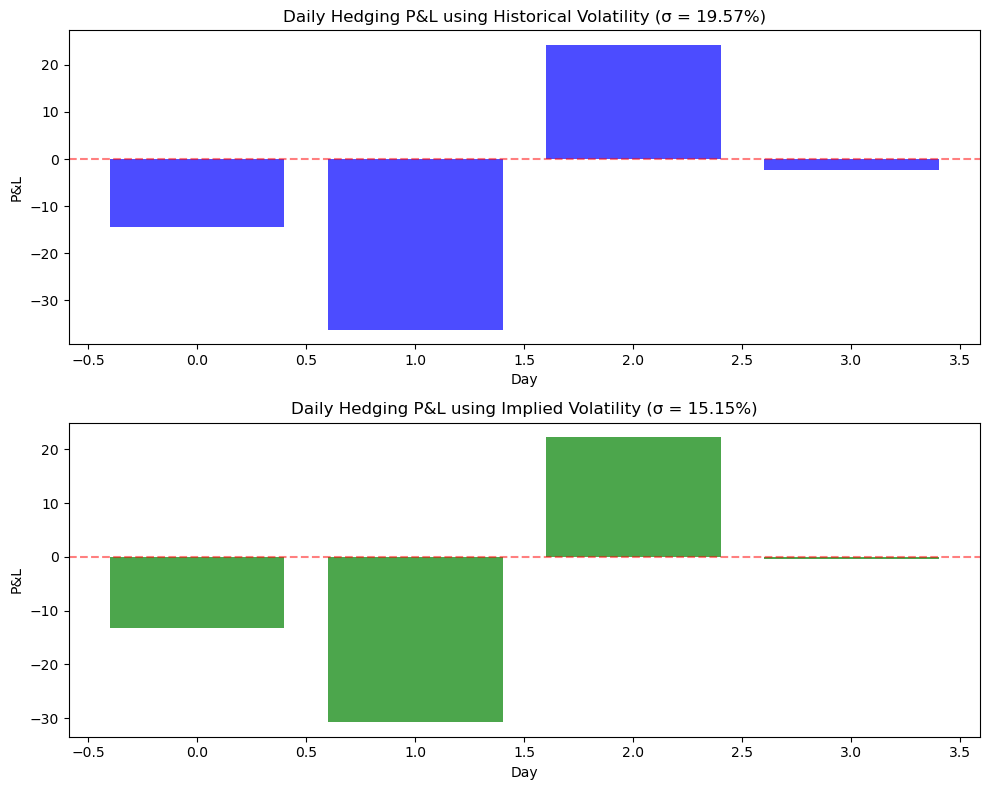

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.bar(range(len(ret1)), ret1, color='blue', alpha=0.7)
ax1.set_title(f'Daily Hedging P&L using Historical Volatility (σ = {sigma1:.2%})')
ax1.set_xlabel('Day')
ax1.set_ylabel('P&L')
ax1.axhline(y=0, color='r', linestyle='--', alpha=0.5)

ax2.bar(range(len(ret2)), ret2, color='green', alpha=0.7)
ax2.set_title(f'Daily Hedging P&L using Implied Volatility (σ = {sigma2:.2%})')
ax2.set_xlabel('Day')
ax2.set_ylabel('P&L')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

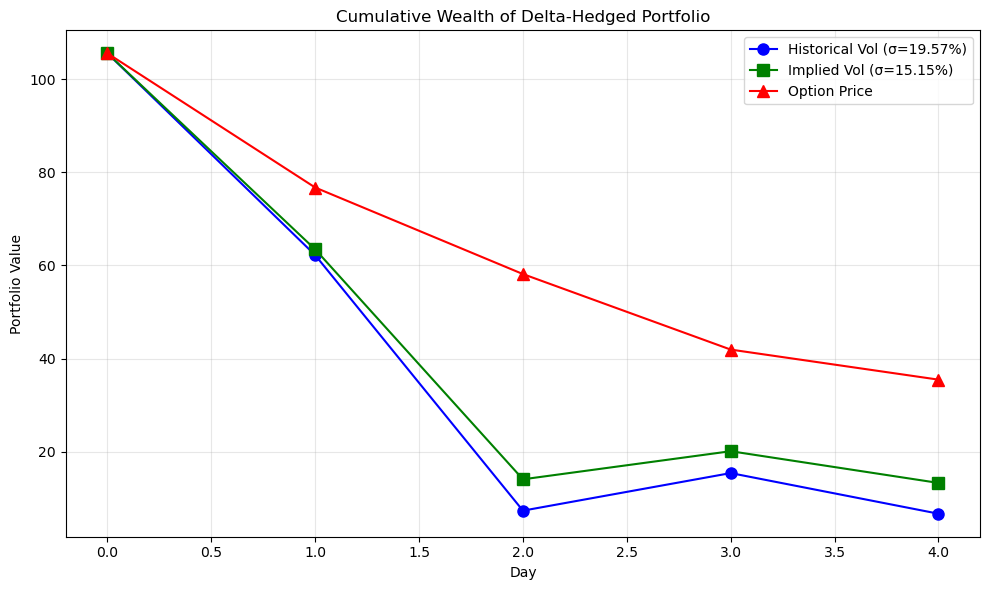

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(range(len(wealth1)), wealth1, 'b-o', label=f'Historical Vol (σ={sigma1:.2%})', markersize=8)
ax.plot(range(len(wealth2)), wealth2, 'g-s', label=f'Implied Vol (σ={sigma2:.2%})', markersize=8)
ax.plot(range(len(C)), C, 'r-^', label='Option Price', markersize=8)

ax.set_title('Cumulative Wealth of Delta-Hedged Portfolio')
ax.set_xlabel('Day')
ax.set_ylabel('Portfolio Value')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
print("="*60)
print("DELTA HEDGING SUMMARY")
print("="*60)
print(f"\nStrike Price: {strike}")
print(f"Expiration Date: {target_expiration}")
print(f"\nVolatility Estimates:")
print(f"  Historical Volatility (σ1): {sigma1:.4f} ({sigma1*100:.2f}%)")
print(f"  Implied Volatility (σ2):    {sigma2:.4f} ({sigma2*100:.2f}%)")
print(f"\nHedging Performance:")
print(f"  Total P&L (Historical Vol): {sum(ret1):.4f}")
print(f"  Total P&L (Implied Vol):    {sum(ret2):.4f}")
print(f"\nFinal Portfolio Values:")
print(f"  Using Historical Vol: {wealth1[-1]:.4f}")
print(f"  Using Implied Vol:    {wealth2[-1]:.4f}")
print(f"  Final Option Price:   {C[-1]:.4f}")
print("="*60)

DELTA HEDGING SUMMARY

Strike Price: 5500
Expiration Date: 2024-09-20

Volatility Estimates:
  Historical Volatility (σ1): 0.1957 (19.57%)
  Implied Volatility (σ2):    0.1515 (15.15%)

Hedging Performance:
  Total P&L (Historical Vol): -28.7840
  Total P&L (Implied Vol):    -22.1769

Final Portfolio Values:
  Using Historical Vol: 6.6940
  Using Implied Vol:    13.3010
  Final Option Price:   35.4780
